In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')


In [2]:
us=pd.read_csv('archive/USvideos.csv')

In [3]:
us.shape

(40949, 16)

In [4]:
us.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
us.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [6]:
us[['trending_date','publish_time']].head()

,trending_date,publish_time
0,17.14.11,2017-11-13T17:13:01.000Z
1,17.14.11,2017-11-13T07:30:00.000Z
2,17.14.11,2017-11-12T19:05:24.000Z
3,17.14.11,2017-11-13T11:00:04.000Z
4,17.14.11,2017-11-12T18:01:41.000Z


In [7]:
us['publish_time']=us['publish_time'].astype('datetime64[ns]')

In [8]:
us['trending_date']=['20']+ us['trending_date']

In [9]:
us['trending_date'] = pd.to_datetime(us['trending_date'], format = "%Y.%d.%m")

In [10]:
us[['trending_date','publish_time']].dtypes

trending_date    datetime64[ns]
publish_time     datetime64[ns]
dtype: object

### The difference between the time a video is published and its trending time might be a useful piece of information for the analysis. Since both columns have datetime data type, we can easily calculate the time difference.

In [11]:
us['time_diff'] = us['trending_date'] - us['publish_time']

In [12]:
us['time_diff'][:5]

0   0 days 06:46:59
1   0 days 16:30:00
2   1 days 04:54:36
3   0 days 12:59:56
4   1 days 05:58:19
Name: time_diff, dtype: timedelta64[ns]

In [13]:
print(us['publish_time'].dt.date[0])

2017-11-13


In [14]:
print(us['publish_time'].dt.time[0])

17:13:01


In [15]:
us['title'][:5]

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: title, dtype: object

In [16]:
us['title'] = us['title'].str.lower()
us['title'][:5]

0                   we want to talk about our marriage
1    the trump presidency: last week tonight with j...
2    racist superman | rudy mancuso, king bach & le...
3                     nickelback lyrics: real or fake?
4                             i dare you: going bald!?
Name: title, dtype: object

### Removing Puntuations from the data

In [17]:
us['title'] = us['title'].str.replace(r'[^\w\s]+', '')
us['title'][:5]

C:\Users\ShadhilSirajudheen\.conda\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                   we want to talk about our marriage
1    the trump presidency last week tonight with jo...
2    racist superman  rudy mancuso king bach  lele ...
3                       nickelback lyrics real or fake
4                                i dare you going bald
Name: title, dtype: object

In [18]:
us['title'][1]

'the trump presidency last week tonight with john oliver hbo'

#### The data type of the time diff column is timedelta which allows for using aggregate functions so we can apply the mean function.

In [19]:
us.time_diff.mean()

Timedelta('16 days 05:21:53.236220664')

In [20]:
us.channel_title.nunique()

2207

##### The data type of the time_diff column is timedelta. We need to convert it to a numerical variable to plot its distribution.

In [21]:
us['time_diff_hour'] = us['time_diff'] / pd.Timedelta('1 hour')

<AxesSubplot:ylabel='time_diff_hour'>

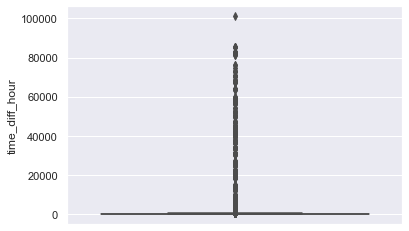

In [22]:
sns.boxplot(data=us, y='time_diff_hour')

In [23]:
len(us)


40949

In [24]:
len(us[us.time_diff_hour > 600])

588

##### The number of rows in which the time difference is more than 600 hours is 588 which is very small compared to the total number rows in the dataset. Thus, we can drop these outliers.

In [25]:
us = us[us.time_diff_hour <= 600]

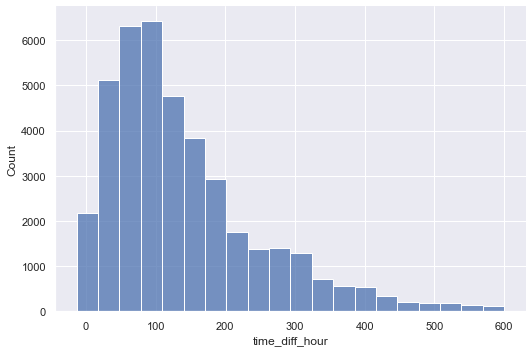

In [26]:
sns.displot(data=us, x='time_diff_hour', kind='hist',
aspect=1.5, bins=20)

# Most of the values are around 100 so it is like to become trending in approximately 4 days.

In [34]:
us.channel_title.value_counts()[:10]

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64

In [30]:
us['views_mil'] = us['views'] / 1000000

In [31]:
us.views_mil

0        0.748374
1        2.418783
2        3.191434
3        0.343168
4        2.095731
           ...   
40932    1.437051
40933    0.979732
40934    8.607264
40935    4.945185
40936    3.229540
Name: views_mil, Length: 40361, dtype: float64

In [33]:
us[['channel_title','views_mil']].groupby('channel_title').agg(['mean','count']).sort_values(by=('views_mil','count'), ascending=False)[:10]

views_mil      
                                            mean count
channel_title                                         
ESPN                                    0.520464   203
The Tonight Show Starring Jimmy Fallon  1.377799   197
Vox                                     0.635409   193
Netflix                                 0.962789   193
TheEllenShow                            1.315244   193
The Late Show with Stephen Colbert      0.661367   187
Jimmy Kimmel Live                       1.534509   186
Late Night with Seth Meyers             0.992362   183
Screen Junkies                          1.753162   182
NBA                                     0.400025   181

## The Screen Junkies channel has the highest average which is about 1.75 million per video. ESPN has the second lowest average although it has the highest number of trending videos.

In [35]:
daily = us[['trending_date']].value_counts().reset_index().sort_values(by='trending_date').reset_index(drop=True)

In [36]:
daily.head()

,trending_date,0
0,2017-11-14,192
1,2017-11-15,195
2,2017-11-16,195
3,2017-11-17,197
4,2017-11-18,199


### The daily dataframe contains the date and the number of videos that become trending in each date.

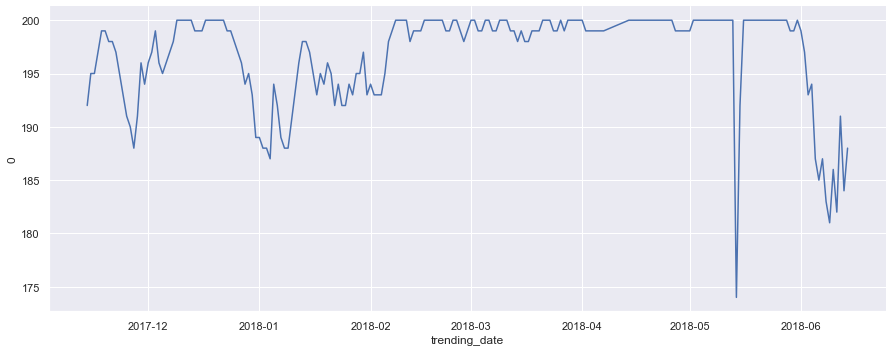

In [37]:
sns.relplot(data=daily, x='trending_date', y=0,kind='line', aspect=2.5)

In [38]:
us.sort_values(by='views', ascending=False)[['title','views']].iloc[0,:]

title    childish gambino  this is america official video
views                                           217750076
Name: 38146, dtype: object